European Call Option:
Price: 23.223250415398105
Delta: 0.6191615505509136

European Put Option:
Price: 3.8377472001648307
Delta: -0.3808384494490864


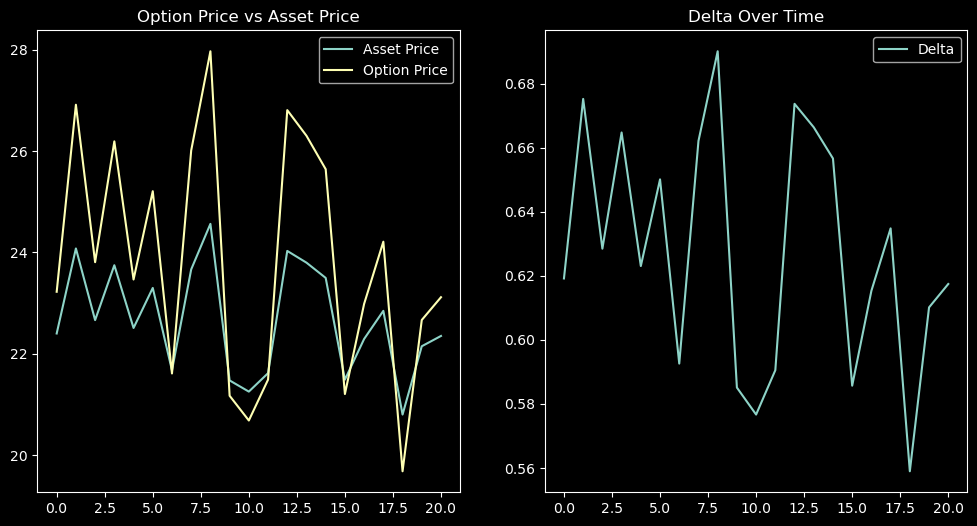

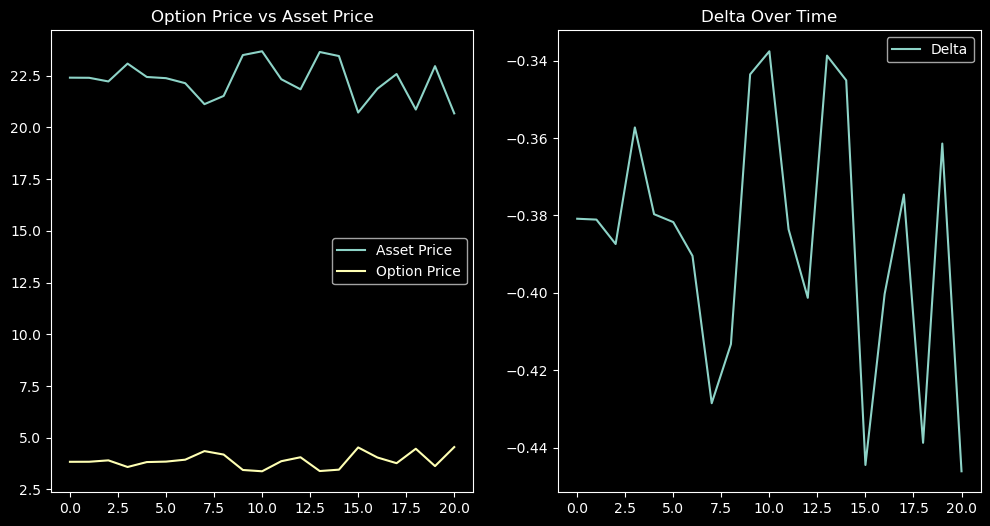

In [46]:
import math
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class EuropeanCall:

    def d1(self, asset_price, strike_price, risk_free_rate, volatility, dt): 
        return (np.log(asset_price/strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * dt)/(volatility * np.sqrt(dt))
   
    def d2(self, d1, volatility, dt):
        return d1 - (volatility * np.sqrt(dt))

    def price(self, asset_price, d1, strike_price, d2, risk_free_rate, dt):
        return asset_price * norm.cdf(d1) + strike_price * np.exp(-risk_free_rate * dt) * norm.cdf(d2)
    
    def delta(self, d1):
        return norm.cdf(d1)

    def exercise_prob(self):
        # When asset price is closer or greater than strike price, we are more likely to execute EuropeanCall Option
        return 1 - norm.cdf(((self.strike_price - self.asset_price) - (self.drift*self.asset_price*self.dt))/((self.volatility*self.asset_price)*(self.dt**.5)))

    def __init__(self, asset_price, strike_price, volatility, expiration_date, risk_free_rate, drift):
        self.asset_price = asset_price
        self.strike_price = strike_price
        self.volatility = volatility
        self.expiration_date = expiration_date
        self.risk_free_rate = risk_free_rate
        self.drift = drift
        # Calculate delta t in years，assuming there are 252 trading days in a year
        dt = np.busday_count(datetime.date.today(), expiration_date) / 252
        # Calculate d1
        d1 = self.d1(asset_price, strike_price, risk_free_rate, volatility, dt)
        # Calculate d2
        d2 = self.d2(d1, volatility, dt)
        self.dt = dt
        self.price = self.price(asset_price, d1, strike_price, d2, risk_free_rate, dt)
        self.delta = self.delta(d1)

        
class EuropeanPut:  
    
    def d1(self, asset_price, strike_price, risk_free_rate, volatility, dt): 
        return (np.log(asset_price/strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * dt)/(volatility * np.sqrt(dt))
   
    def d2(self, d1, volatility, dt):
        return d1 - (volatility * np.sqrt(dt))

    def price(self, asset_price, d1, strike_price, d2, risk_free_rate, dt):
        return strike_price * np.exp(-risk_free_rate * dt) * norm.cdf(-d2) - asset_price * norm.cdf(-d1)
    
    def delta(self, d1):
        return norm.cdf(d1) - 1
    
    def exercise_prob(self):
        # When asset price is closer or smaller than strike price, we are more likely to execute EuropeanPut Option
        return norm.cdf(((self.strike_price - self.asset_price) - (self.drift*self.asset_price*self.dt))/((self.volatility*self.asset_price)*(self.dt**.5)))

    def __init__(self, asset_price, strike_price, volatility, expiration_date, risk_free_rate, drift):
        self.asset_price = asset_price
        self.strike_price = strike_price
        self.volatility = volatility
        self.expiration_date = expiration_date
        self.risk_free_rate = risk_free_rate
        self.drift = drift
        # Calculate delta t in years，assuming there are 252 trading days in a year
        dt = np.busday_count(datetime.date.today(), expiration_date) / 252
        # Calculate d1
        d1 = self.d1(asset_price, strike_price, risk_free_rate, volatility, dt)
        # Calculate d2
        d2 = self.d2(d1, volatility, dt)
        self.dt = dt
        self.price = self.price(asset_price, d1, strike_price, d2, risk_free_rate, dt)
        self.delta = self.delta(d1)
        self.asset_price = asset_price

class DeltaHedgingSimulator:
    def __init__(self, initial_price, strike_price, volatility, expiration_date, risk_free_rate, drift, option_type):
        if option_type == 'call':
            self.option = EuropeanCall(initial_price, strike_price, volatility, expiration_date, risk_free_rate, drift)
        elif option_type == 'put':
            self.option = EuropeanPut(initial_price, strike_price, volatility, expiration_date, risk_free_rate, drift)
        else:
            raise ValueError("Option type must be 'call' or 'put'")
        
        self.asset_price = [initial_price]
        self.option_price = [self.option.price]
        self.delta = [self.option.delta]
        self.index = 0
    
    def update(self, new_price):
        self.asset_price.append(new_price)
        if isinstance(self.option, EuropeanCall):
            self.option = EuropeanCall(new_price, self.option.strike_price, self.option.volatility, self.option.expiration_date, self.option.risk_free_rate, self.option.drift)
        elif isinstance(self.option, EuropeanPut):
            self.option = EuropeanPut(new_price, self.option.strike_price, self.option.volatility, self.option.expiration_date, self.option.risk_free_rate, self.option.drift)
        self.option_price.append(self.option.price)
        self.delta.append(self.option.delta)
        self.index += 1
    
    def plot_results(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.asset_price, label='Asset Price')
        plt.plot(self.option_price, label='Option Price')
        plt.legend()
        plt.title('Option Price vs Asset Price')
        
        plt.subplot(1, 2, 2)
        plt.plot(self.delta, label='Delta')
        plt.legend()
        plt.title('Delta Over Time')
        
        plt.show()

    
initial_price = 22.4
strike_price = 23
volatility = 0.4
expiration_date = datetime.date(2026, 1, 31)
risk_free_rate = 0.04
drift = 0.2
    
call_option = EuropeanCall(asset_price, strike_price, volatility, expiration_date, risk_free_rate, drift)
put_option = EuropeanPut(asset_price, strike_price, volatility, expiration_date, risk_free_rate, drift)
    
print("European Call Option:")
print(f"Price: {call_option.price}") #23.223250415398105
print(f"Delta: {call_option.delta}") #0.6191615505509136
    
print("\nEuropean Put Option:")
print(f"Price: {put_option.price}") #3.8377472001648307
print(f"Delta: {put_option.delta}") #-0.3808384494490864
    

# Plot For Call Option
call_simulator = DeltaHedgingSimulator(initial_price, strike_price, volatility, expiration_date, risk_free_rate, drift, 'call')
for _ in range(20):
    new_price = initial_price + np.random.normal(0, 1)
    call_simulator.update(new_price)

call_simulator.plot_results()

# Plot For Put Option
put_simulator = DeltaHedgingSimulator(initial_price, strike_price, volatility, expiration_date, risk_free_rate, drift, 'put')
for _ in range(20):
    new_price = initial_price + np.random.normal(0, 1)
    put_simulator.update(new_price)
    
put_simulator.plot_results()

# Limitation:
# Frequent adjustments to maintain the delta hedge can lead to transaction costs and may affect the overall effectiveness of the hedging strategy
